In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data=data.drop(["customerID"],axis="columns")

In [5]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
data.shape

(7043, 20)

In [7]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


Text(0.5, 1.0, 'count of customer churn')

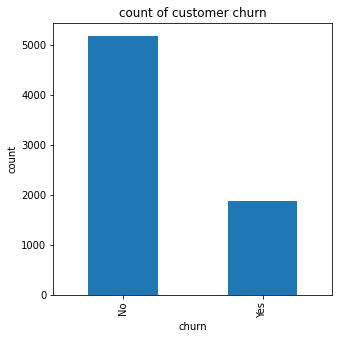

In [9]:
plt.figure(figsize=(5,5))
data["Churn"].value_counts().plot(kind="bar")
plt.xlabel("churn")
plt.ylabel("count")
plt.title("count of customer churn")

In [10]:
data.TotalCharges=pd.to_numeric(data.TotalCharges,errors="coerce")

In [11]:
#checking for the missing values

In [12]:
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [13]:
missing_values=[feature for feature in data.columns if data[feature].isnull().sum()>0]
for feature in missing_values:
  print("{} has {} missing values".format(feature,np.round(data[feature].isnull().mean(),4)))

TotalCharges has 0.0016 missing values


In [14]:
#convert the target feature from caategorical to numeric
data.Churn=data.Churn.map({"Yes":1,"No":0})

In [15]:
missing_values

['TotalCharges']

In [16]:
#since Total Charges has the minimum amount of the missing values so we will drop the missing values

In [17]:
data.dropna(axis=0,inplace=True)

In [18]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [19]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [20]:
#numerical features:
numerical_feature=[feature for feature in data.columns if data[feature].dtypes!='O']
for feature in numerical_feature:
  print("There are {} numerical feature".format(len(numerical_feature)))

There are 5 numerical feature
There are 5 numerical feature
There are 5 numerical feature
There are 5 numerical feature
There are 5 numerical feature


In [21]:
numerical_feature

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

In [22]:
#categorical features
cat_features=[feature for feature in data.columns if data[feature].dtypes=='O']
for feature in cat_features:
  print("{} feature consists of {} unique feature".format(feature,len(data[feature].unique())))

gender feature consists of 2 unique feature
Partner feature consists of 2 unique feature
Dependents feature consists of 2 unique feature
PhoneService feature consists of 2 unique feature
MultipleLines feature consists of 3 unique feature
InternetService feature consists of 3 unique feature
OnlineSecurity feature consists of 3 unique feature
OnlineBackup feature consists of 3 unique feature
DeviceProtection feature consists of 3 unique feature
TechSupport feature consists of 3 unique feature
StreamingTV feature consists of 3 unique feature
StreamingMovies feature consists of 3 unique feature
Contract feature consists of 3 unique feature
PaperlessBilling feature consists of 2 unique feature
PaymentMethod feature consists of 4 unique feature


In [23]:
#there are low unique categories so we can create dummies

In [24]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [25]:
data=pd.get_dummies(data)

In [26]:
data.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


In [27]:
data.shape

(7032, 46)

In [28]:
#now lets use the above modified data to the build the model

In [29]:
#seperate data into dependent and independent column

In [30]:
y=data.loc[:,"Churn"]
x=data.iloc[:,:47].drop(["Churn"],axis="columns")

In [31]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [32]:
#we should do traintest_split
from sklearn.model_selection import train_test_split,cross_val_score

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=0)

In [34]:
x_train.shape

(4711, 45)

In [35]:
#import the libraries for ANN:
from keras.models import Sequential
from keras.layers import Dense,Input
from keras.layers import Dropout

In [43]:
#initilising the ANN
classifier=Sequential()
#Adding the hidden layer with the input layer
classifier.add(Dense(units=16,kernel_initializer="he_uniform",activation="relu",input_dim=45))
#adding the hidden layer
classifier.add(Dense(units=32,kernel_initializer="he_uniform",activation="relu"))
classifier.add(Dense(units=64,kernel_initializer="he_uniform",activation="relu"))
classifier.add(Dense(units=128,kernel_initializer="he_uniform",activation="relu"))
#add the output layer
classifier.add(Dense(units=1,kernel_initializer="glorot_uniform",activation="sigmoid"))

In [44]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 16)                736       
_________________________________________________________________
dense_6 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_7 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_8 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 129       
Total params: 11,841
Trainable params: 11,841
Non-trainable params: 0
_________________________________________________________________


In [45]:
#compile the ANN:
classifier.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])

In [46]:

model_history=classifier.fit(x_train, y_train,validation_split=0.33, batch_size = 10,epochs=10)


Epoch 1/10
316/316 [==============================] - 1s 2ms/step - loss: 21.9090 - accuracy: 0.6689 - val_loss: 35.8982 - val_accuracy: 0.7537
Epoch 2/10
316/316 [==============================] - 1s 2ms/step - loss: 17.7889 - accuracy: 0.6903 - val_loss: 7.0636 - val_accuracy: 0.7563
Epoch 3/10
316/316 [==============================] - 1s 2ms/step - loss: 6.4832 - accuracy: 0.7076 - val_loss: 6.0474 - val_accuracy: 0.4379
Epoch 4/10
316/316 [==============================] - 1s 2ms/step - loss: 4.4314 - accuracy: 0.7292 - val_loss: 2.8294 - val_accuracy: 0.7582
Epoch 5/10
316/316 [==============================] - 1s 2ms/step - loss: 4.1850 - accuracy: 0.7323 - val_loss: 1.5950 - val_accuracy: 0.4900
Epoch 6/10
316/316 [==============================] - 1s 2ms/step - loss: 2.1381 - accuracy: 0.7304 - val_loss: 2.0468 - val_accuracy: 0.7878
Epoch 7/10
316/316 [==============================] - 1s 2ms/step - loss: 2.3569 - accuracy: 0.7470 - val_loss: 1.8450 - val_accuracy: 0.7916
Epo

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


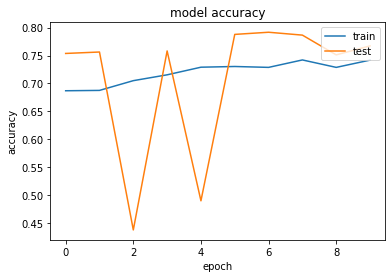

In [58]:
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


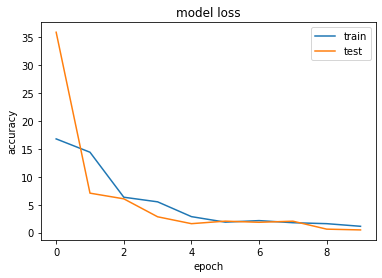

In [60]:
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [61]:
y_pred=classifier.predict(x_test)
y_pred=(y_pred>0.5)

In [62]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [63]:
cm=confusion_matrix(y_test,y_pred)

In [64]:
cm

array([[1466,  234],
       [ 297,  324]])

In [65]:
score=accuracy_score(y_test,y_pred)

In [66]:
score

0.7712193020249892